Ce notebook effectue une Analyse Exploratoire des Données (EDA) sur le dataset STEAM téléchargé depuis https://www.kaggle.com/nikdavis/steam-store-games.

Ces données ont été recueillies sur le Steam Store ainsi que l'API SteamSpy en mai 2019. Elles comprennent des informations sur plus de 27 000 jeux disponibles sur la plateforme Steam.

# Bibliothèques Python et styles

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_theme(style="whitegrid")
sns.set(font_scale=0.8)
plt.rcParams['axes.titlesize'] = 10

# Préparation / Nettoyage du dataset

In [ ]:
# Importation du dataset
df_steam = pd.read_csv(r"/content/drive/MyDrive/Projets/Projet STEAM/Dataset/steam.csv")

In [ ]:
# Visualisation des 5 premières lignes du dataframe
df_steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
# Format du dataframe
print("Nombre de lignes:",df_steam.shape[0])
print("Nombre de colonnes:",df_steam.shape[1])

Nombre de lignes: 27075
Nombre de colonnes: 18


In [ ]:
# Résumé des informations du dataframe
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [ ]:
# Passons 'release_date' au format date
df_steam['release_date'] = pd.to_datetime(df_steam['release_date'])

# Les colonnes 'appid', 'required_age', 'steamspy_tags' et 'achievements' ne seront pas nécessaires à l'analyse et peuvent être supprimées
df_steam = df_steam.drop(['appid', 'required_age', 'steamspy_tags', 'achievements'], axis=1)

In [ ]:
# Vérifions s'il n'y a pas de valeurs manquantes
df_steam.isna().sum()

name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
categories          0
genres              0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

# Statistiques descriptives

In [ ]:
# Quelles premières observations peut-on tirer des colonnes de type numérique (int, float) ?
df_steam.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
english,27075.0,0.981127,0.136081,0.0,1.00,1.00,1.00,1.00
positive_ratings,27075.0,1000.558523,18988.724439,0.0,6.00,24.00,126.00,2644404.00
negative_ratings,27075.0,211.027147,4284.938531,0.0,2.00,9.00,42.00,487076.00
average_playtime,27075.0,149.804949,1827.038141,0.0,0.00,0.00,0.00,190625.00
median_playtime,27075.0,146.056030,2353.880080,0.0,0.00,0.00,0.00,190625.00
price,27075.0,6.078193,7.874922,0.0,1.69,3.99,7.19,421.99



Observations
- Environ 98,11% des jeux ont une version en anglais.
- La plupart des jeux n'ont aucune restriction d'âge.
- Il y a une grande variabilité dans le nombre d'avis positifs, allant de 0 à plus de 2,6 millions. Un jeu a en moyenne 1000 évaluations positives (mais cela n'est pas significatif, avec une déviation standard très élevée de 18988,72).
- Comme pour les évaluations positives, il y a une grande variabilité dans le nombre d'évaluations négatives, allant de 0 à près de 487 076. Un jeu a en moyenne 211 évaluations négatives (déviation standard de 4284,94).
- Plus de 75% des jeux ont un temps de jeu moyen de 0 minutes (75e percentile = 0)
- Le prix moyen d'un jeu sur la plateforme Steam est d'environ 6,08£ (les données ont été récoltés en livres sterling). Les prix varient de 0 à environ 422.

# Combien de jeux sont publiés chaque année sur Steam ?

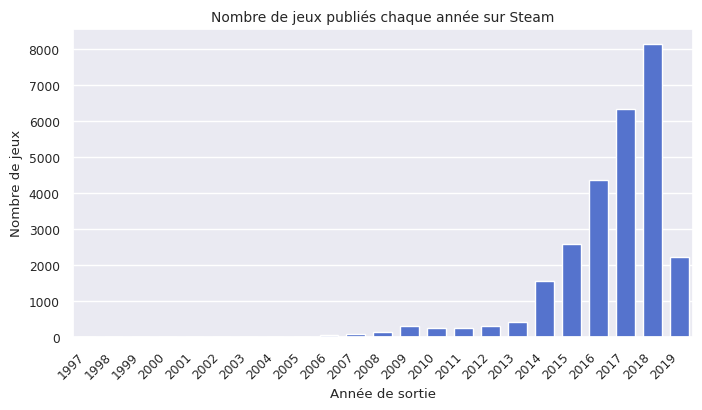

In [ ]:
# Création d'une nouvelle colonne 'year'
df_steam['year'] = df_steam['release_date'].dt.year

# Visualisation des jeux publiés au cours du temps
games_by_year = df_steam.groupby('year')['name'].count().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=games_by_year, x='year', y='name', width=0.7, color='royalblue')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de jeux')
plt.title('Nombre de jeux publiés chaque année sur Steam')
plt.xticks(rotation=45, ha='right')
plt.show()

Observations
- L'année 2019 n'est pas complète (pas de données après mai), elle n'est donc pas représentative.
- Très peu de jeux ont été publiés avant 2006 (avant l'ouverture de Steam aux partenariats avec d'autres développeurs ou éditeurs)
- On constate une croissance exponentielle du nombre jeux publiés sur Steam à partir de 2013, ce qui correspond au lancement de Steam Greenlight en 2012 (qui a permis à n'importe quel développeur ou éditeur de proposer leurs titres sur la plateforme).

In [ ]:
# Que s'est-il passé les premières années ?
selected_years = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005]
df_steam[df_steam['year'].isin(selected_years)][['name', 'year', 'developer', 'publisher']].sort_values(by='year')

,name,year,developer,publisher
2685,Carmageddon Max Pack,1997,Stainless Games Ltd,THQ Nordic
6,Half-Life,1998,Valve,Valve
1,Team Fortress Classic,1999,Valve,Valve
4,Half-Life: Opposing Force,1999,Gearbox Software,Valve
5,Ricochet,2000,Valve,Valve
0,Counter-Strike,2000,Valve,Valve
8,Half-Life: Blue Shift,2001,Gearbox Software,Valve
1185,Geneforge 1,2001,Spiderweb Software,Spiderweb Software
988,Gothic 1,2001,Piranha Bytes,THQ Nordic
3,Deathmatch Classic,2001,Valve,Valve


Observations
- "Half-Life", sorti en 1998, est le jeu qui a propulsé le studio Vavle sur la scène mondiale.
- Steam a été lancé en 2003 par Valve en tant que plateforme de distribution de mises à jour et de correctifs pour leurs jeux.
- Valve n'a commencé son partenariat avec d'autres éditeurs qu'en 2005, permettant la distribution de nouveaux jeux via Steam. Il semble donc cohérent que les plus vieux jeux publiés proviennent seulement de quelques studios partenaires de Valve (THQ Nordic, Spiderweb Software, 2K...)

# Quels sont les jeux avec le plus d'évaluations positives ?

In [ ]:
# Top 10 des jeux qui ont le plus d'évaluations positives
top_10_games = df_steam.sort_values(by='positive_ratings', ascending=False).head(10)[["name", "developer", "year", "positive_ratings"]]
top_10_games

,name,developer,year,positive_ratings
25,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,2012,2644404
22,Dota 2,Valve,2013,863507
19,Team Fortress 2,Valve,2007,515879
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,2017,496184
121,Garry's Mod,Facepunch Studios,2006,363721
2478,Grand Theft Auto V,Rockstar North,2015,329061
1467,PAYDAY 2,OVERKILL - a Starbreeze Studio.,2013,308657
3362,Unturned,Smartly Dressed Games,2017,292574
1120,Terraria,Re-Logic,2011,255600
21,Left 4 Dead 2,Valve,2009,251789


Observations
- Sans surprise, le podium est occupé par 3 jeux PC extrêmement populaires : "Counter-Strike: Global Offensive", "Dota 2" et "Team Fortress 2". Tous trois ont été développés par la propre société mère de Steam, Valve Software.

# Les jeux les plus téléchargés ont-ils des charactéristiques communes ?

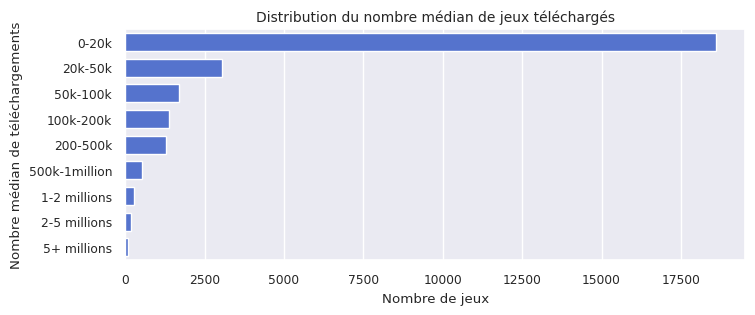

In [ ]:
# Intéressons-nous maintenant à la colonne "owner" : le nombre de personnes qui possèdent le jeu

# Rajoutons une colonne qui donne la médiane de la colonne 'owner' (utile juste après)
df_steam['owner_median'] = df_steam['owners'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

# Puis remplaçons les valeurs dans la colonne "owners" pour plus de visibilité
owners_mapping = {
    '100000000-200000000': '5+ millions',
    '50000000-100000000': '5+ millions',
    '20000000-50000000': '5+ millions',
    '10000000-20000000': '5+ millions',
    '5000000-10000000': '5+ millions',
    '2000000-5000000': '2-5 millions',
    '1000000-2000000': '1-2 millions',
    '500000-1000000': '500k-1million',
    '200000-500000': '200-500k',
    '100000-200000': '100k-200k',
    '50000-100000': '50k-100k',
    '20000-50000': '20k-50k',
    '0-20000': '0-20k'
}
df_steam['owners'] = df_steam['owners'].replace(owners_mapping)

# Distribution de 'owner'
plt.figure(figsize=(8,3))
sns.countplot(data=df_steam, y='owners', order=df_steam.owners.value_counts().index, width=0.7, color='royalblue')
plt.xlabel('Nombre de jeux')
plt.ylabel('Nombre médian de téléchargements')
plt.title('Distribution du nombre médian de jeux téléchargés')
plt.show()

Observations
- L'écrasante majorité des jeux est déténué par moins de 20 000 personnes.

In [ ]:
# Top 6 des jeux les plus téléchargés (basé sur la médiane)
df_steam.sort_values(by='owner_median', ascending=False).head(6)[['name', 'owner_median', "year", "genres", "price"]]

,name,owner_median,year,genres,price
22,Dota 2,150000000.0,2013,Action;Free to Play;Strategy,0.00
25,Counter-Strike: Global Offensive,75000000.0,2012,Action;Free to Play,0.00
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,75000000.0,2017,Action;Adventure;Massively Multiplayer,26.99
19,Team Fortress 2,35000000.0,2007,Action;Free to Play,0.00
3362,Unturned,35000000.0,2017,Action;Adventure;Casual;Free to Play;Indie,0.00
1634,Warframe,35000000.0,2013,Action;Free to Play,0.00


Observations
- 6 jeux se distinguent avec un nombre de téléchargements médian dépassant les 35 millions.
- Dota 2 occupe la première position (de loin) avec 150 millions de téléchargements.
- On peut noter que 5 de ces jeux sont gratuits (Free to Play).
- 4 de ces jeux ont été publiés avant 2013, ce qui pourrait leur avoir laissé de nombreuses années pour croitre leur player base.

# Temps de jeu moyen

In [ ]:
# Convertissons la colonne 'average_playtime' (minutes) en heures pour une meilleure visualisation
df_steam["average_playtime"] = (df_steam["average_playtime"]/60).round(2)

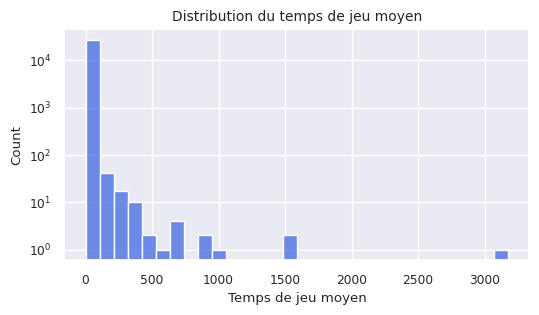

In [ ]:
# Intéressons-nous à la distribution de la colonne 'average_playtime'
# On utilise une échelle logarythmique (grande plage de valeurs à 0)
plt.figure(figsize=(6, 3))
g = sns.histplot(data=df_steam, x='average_playtime', bins=30, kde=False, color='royalblue')
g.set_yscale('log')
plt.title('Distribution du temps de jeu moyen')
plt.xlabel('Temps de jeu moyen')
plt.show()

Observations
- La plupart des jeux sur Steam ont un temps de jeu moyen égal à 0.
- On constate des temps de jeu moyen à 3000h et 1500h, peut-on voir à quoi ils correspondent ?


In [ ]:
# Top 10 des jeux avec le temps moyen de jeu le plus élevé
top_10_games = df_steam.sort_values(by='average_playtime', ascending=False).head(10)[["name", "genres", "year", "price", "average_playtime", "owners"]]
top_10_games

,name,genres,year,price,average_playtime,owners
9201,The Abbey of Crime Extensum,Adventure;Free to Play,2016,0.00,3177.08,50k-100k
1478,The Banner Saga: Factions,Free to Play;Indie;RPG;Strategy,2013,0.00,1587.42,200-500k
6014,The Secret of Tremendous Corporation,Adventure;Casual;Free to Play;Indie,2015,0.00,1587.37,100k-200k
8969,PRICE,Adventure;Casual;Indie,2016,0.00,1058.02,200-500k
3930,Boundless,Action;Adventure;Indie;Massively Multiplayer;RPG,2018,32.99,920.07,20k-50k
3969,Shroud of the Avatar: Forsaken Virtues,Free to Play;Massively Multiplayer;RPG,2018,0.00,910.30,50k-100k
2435,X-Plane 11,Simulation,2017,54.99,736.15,100k-200k
23409,懒人修仙传,Casual;Indie;RPG;Simulation,2018,2.89,727.20,20k-50k
2023,Fantasy Grounds,Indie;RPG;Strategy,2014,29.99,717.90,20k-50k
8919,Screeps,Indie;Massively Multiplayer;Strategy,2016,10.99,646.75,20k-50k


Observations
- Ces résultats sont plus surprenants, avec des titres moins célèbres dans le top 10.
- Ces valeurs indiquent un fort engagement des joueurs, suggérant une expérience de jeu prolongée pour ces titres, qui ne sont pas forcément détenus par une grande player base, mais ceux qui y jouent sont très fidèles.

# Jeux gratuits VS jeux payants

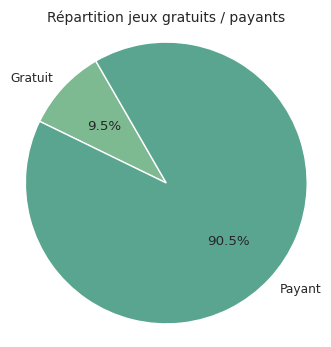

In [ ]:
# Commençons par créer une colonne de type boolean (True si prix = 0)
df_steam["free"] = df_steam["price"] == 0

# Le pie chart représente la répartition entre les jeux gratuits et payants présents sur Steam.
free_dict = dict(df_steam['free'].value_counts())
labels = "Gratuit", "Payant"
sizes = [free_dict[True], free_dict[False]]

plt.figure(figsize=(4, 4))
with sns.color_palette('crest'):
    plt.pie(sizes, labels=labels,
            autopct='%1.1f%%', startangle=120)
plt.axis('equal')
plt.title('Répartition jeux gratuits / payants')
plt.show()

Observations
- Plus de 90% des jeux sur Steam sont payants

# Quelle évolution des prix au cours du temps ?

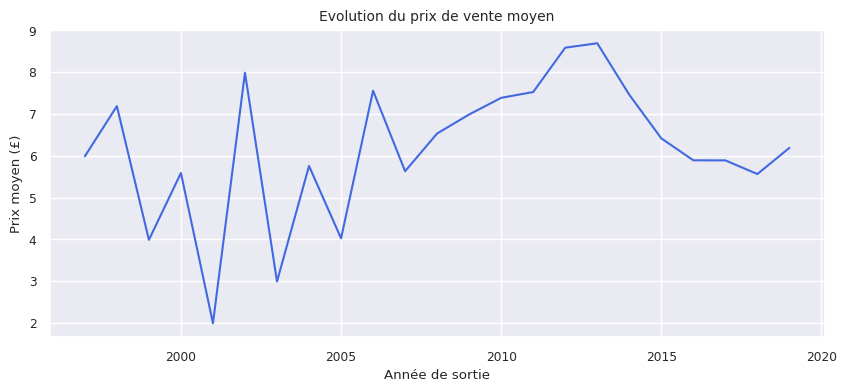

In [ ]:
# Evolution des prix au cours du temps
price_by_year = df_steam.groupby('year')['price'].mean().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(data=price_by_year, x='year', y='price', color='royalblue')
plt.xlabel('Année de sortie')
plt.ylabel('Prix moyen (£)')
plt.title('Evolution du prix de vente moyen')
plt.show()

Observations
- Le prix moyen a varié au fil des années (de 2 à presque 9£).
- On observe une tendance à la baisse des prix du prix moyen depuis 2013, avec un rebond depuis 2018.

# Corrélation entre le prix et les évaluations

<ipython-input-19-ee6155951921>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


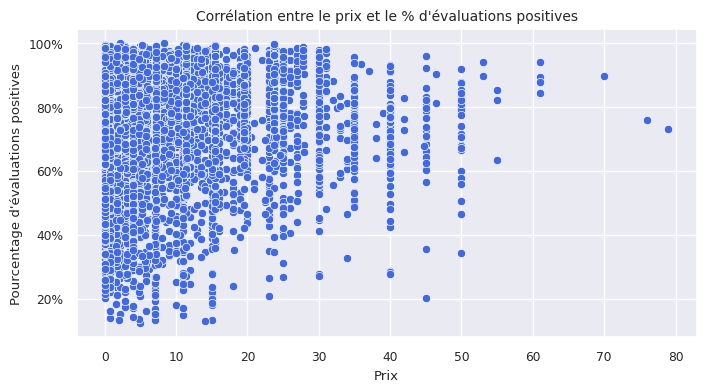

In [ ]:
# Création de 2 colonnes 'nb_ratings' et 'positive_rate'
df_steam['nb_ratings'] = df_steam['positive_ratings'] + df_steam['negative_ratings']
df_steam['positive_rate'] = df_steam['positive_ratings'] / df_steam['nb_ratings']

# Seuls les jeux avec un prix inférieur à 100£ et un nombre de ratings > 100 ont été retenus
plt.figure(figsize=(8,4))
g = sns.scatterplot(x="price", y="positive_rate", data=df_steam[(df_steam['price'] <= 100) & (df_steam['nb_ratings'] > 100)], color='royalblue')
vals = g.get_yticks()
g.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.title("Corrélation entre le prix et le % d'évaluations positives")
plt.xlabel('Prix')
plt.ylabel("% d'évaluations positives")
plt.show()

Observations
- Le pourcentage d'évaluations positives semble augmenter globalement à mesure que le prix augmente.

# Distribution des genres

In [ ]:
# Traitement des données catégorielles (création de colonnes pour chaque genre unique)
df_dummies = df_steam['genres'].str.get_dummies(';')
df_genres = pd.concat([df_steam, df_dummies], axis=1)

In [ ]:
df_genres.head()

,name,release_date,english,developer,publisher,platforms,categories,genres,positive_ratings,negative_ratings,...,Sexual Content,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,124534,3339,...,0,0,0,0,0,0,0,0,0,0
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,3318,633,...,0,0,0,0,0,0,0,0,0,0
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,3416,398,...,0,0,0,0,0,0,0,0,0,0
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,1273,267,...,0,0,0,0,0,0,0,0,0,0
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,5250,288,...,0,0,0,0,0,0,0,0,0,0


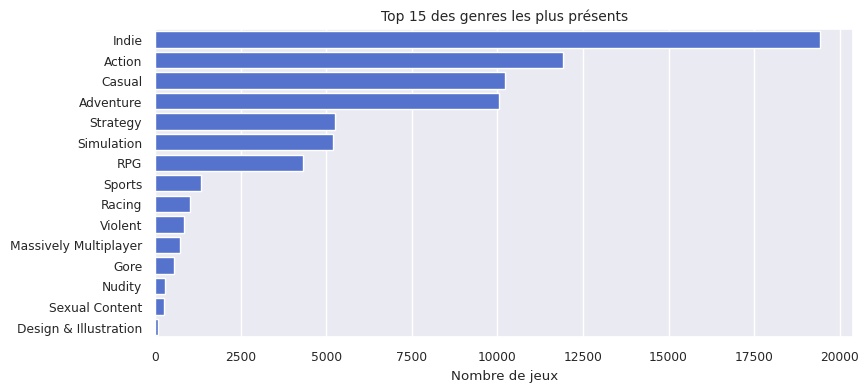

In [ ]:
# Calcul du total de jeux pour chaque genre et sélection des 15 genres les plus présents
genre_total = df_genres.drop(['Early Access', 'Utilities', 'Free to Play'], axis=1)
top_15_genres = genre_total[genre_total.columns[19:]].sum().sort_values(ascending=False).head(15)

# Visualisation
plt.figure(figsize=(9, 4))
sns.barplot(x=top_15_genres.values, y=top_15_genres.index, color='royalblue', orient='horizontal')
plt.title('Top 15 des genres les plus présents')
plt.xlabel('Nombre de jeux')
plt.show()

Observations
- La plupart des jeux sur Steam ont été créés par des développeurs indépendants (indie), c'est donc le genre qui apparaît en numéro 1.

# Quels genres coûtent le plus cher ?

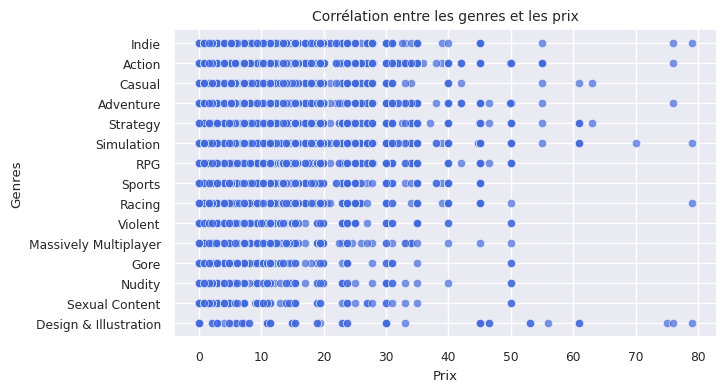

In [ ]:
# Créez un DataFrame avec les genres, les prix et d'autres colonnes pertinentes
cols = top_15_genres.index.values
df_plot = df_genres[['price'] + cols.tolist()]

# Utilisez melt pour transformer le DataFrame pour seaborn
melted_data = pd.melt(df_plot, id_vars='price', var_name='genre', value_name='dummy_value')

# Filtrer les lignes où la dummy_value est égale à 1 (genre présent) et le prix est inférieur à 100
melted_data_filtered = melted_data[(melted_data['dummy_value'] == 1) & (melted_data['price'] <= 100)]

# Configuration des paramètres du graphique
plt.figure(figsize=(7, 4))
sns.scatterplot(x='price', y='genre', data=melted_data_filtered, color='royalblue', alpha=0.7)
plt.title("Corrélation entre les genres et les prix")
plt.xlabel("Prix")
plt.ylabel("Genres")
plt.show()

Observations
- Presque tous les jeux sont vendus à 35£ ou moins, quel que soit leur genre.
- Il semble qu'aucun genre de jeu ne se démarque avec des prix beaucoup plus élevés. Vérifions cela.

<Figure size 1600x800 with 0 Axes>

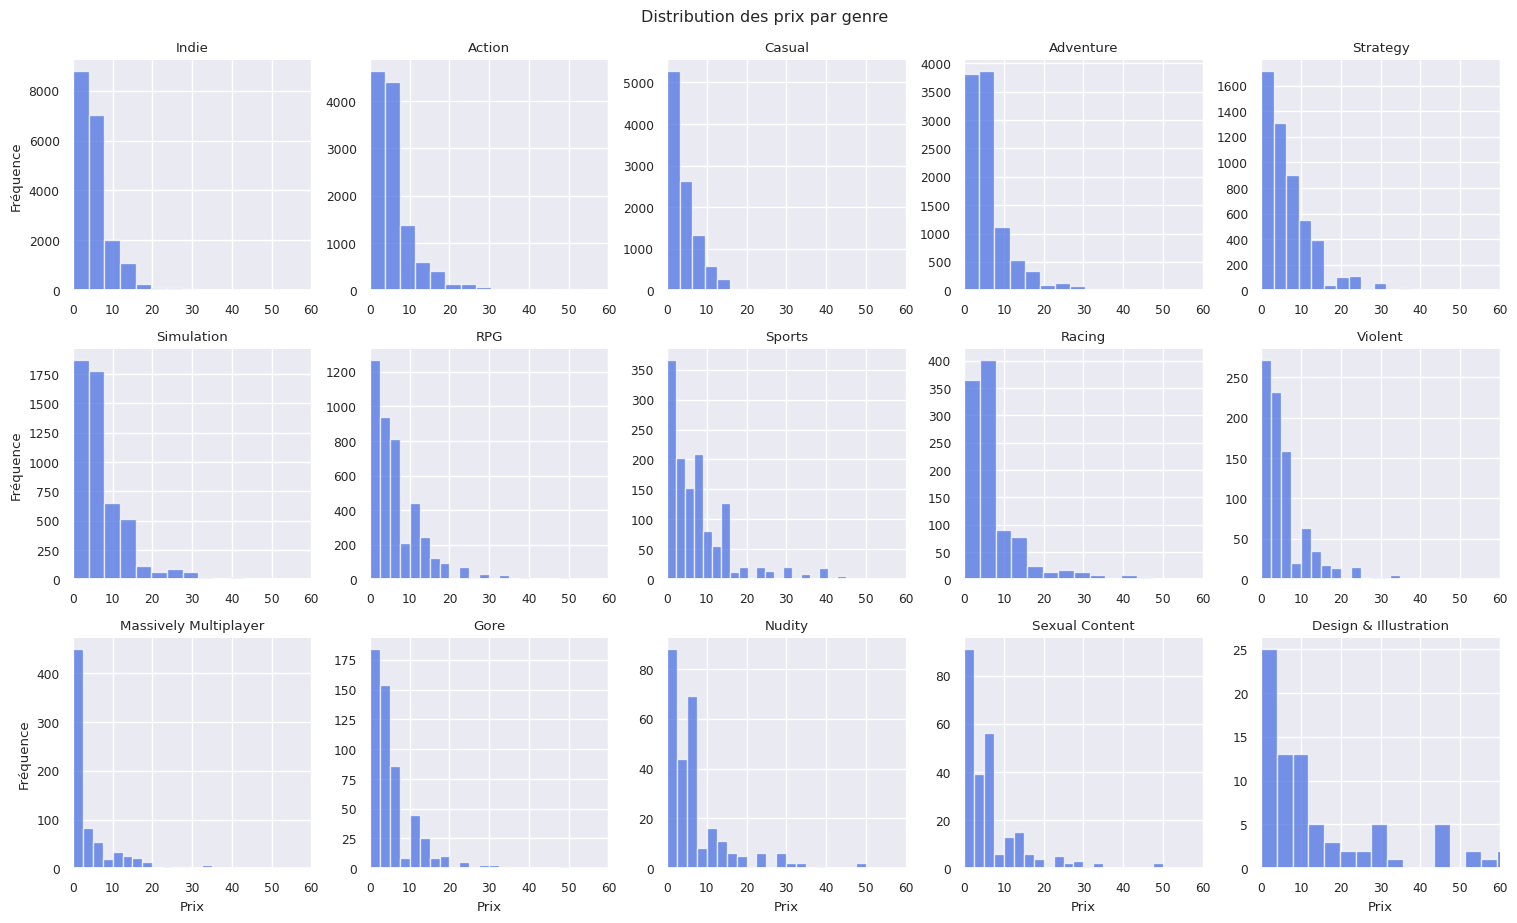

In [ ]:
# Visualisation
plt.figure(figsize=(16, 8))
g = sns.FacetGrid(melted_data_filtered, col='genre', col_wrap=5, height=3, sharex=False, sharey=False, margin_titles=True)
g.map(plt.hist, 'price', bins=20, color='royalblue', alpha=0.7)

g.set(xlim=(0, 60))
g.set_axis_labels("Prix", "Fréquence")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Distribution des prix par genre", y=1.02)
plt.show()

# Développeurs et éditeurs

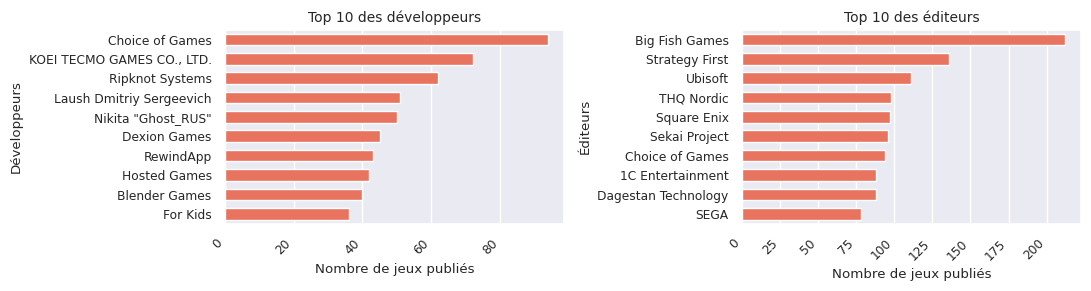

In [ ]:
# Les tops 10 des développeurs et éditeurs qui ont le plus de jeux sur la plateforme Steam
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 3))
titles = ['developer', 'publisher']
titles_fr = ['développeurs', 'éditeurs']

for i, category in enumerate(titles):
    top_10 = df_steam[category].value_counts().sort_values(ascending=False).head(10)
    sns.barplot(y=top_10.index, x=top_10.values, width=0.6, color='tomato', orient='horizontal', ax=axes[i])
    axes[i].set_title(f'Top 10 des {titles_fr[i]}')
    axes[i].set_xlabel('Nombre de jeux publiés')
    axes[i].set_ylabel(f'{titles_fr[i].capitalize()}')
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observations
- On retrouve de grands noms du côté des éditeurs, pas de surprise majeure
- Mais du côté des développeurs, un peu plus étonnant, qui sont ces entreprises ? Essayons de voir.

In [ ]:
agg_developers = df_steam.groupby('developer').agg({'name':'count', 'nb_ratings': ['min', 'max', 'median'], 'price':['min', 'max', 'median']})

agg_developers\
    [agg_developers.index.isin(df_steam.developer.value_counts().iloc[:10].index)]\
    .sort_values(('name', 'count'), ascending=False)

name nb_ratings               price              
                           count        min    max median   min    max median
developer                                                                    
Choice of Games               94          2   1769   14.0  2.09   5.19   3.99
KOEI TECMO GAMES CO., LTD.    72          1  12509  101.5  0.00  54.99  24.39
Ripknot Systems               62          1    101   20.0  4.99  24.99   9.99
Laush Dmitriy Sergeevich      51          1     88    9.0  0.79   4.79   1.69
Nikita "Ghost_RUS"            50          1    131   23.0  0.79   4.79   0.79
Dexion Games                  45          1     43   17.0  0.79   2.09   0.79
RewindApp                     43          3    475   32.0  0.79   3.99   0.79
Hosted Games                  42          1    250   18.5  2.09   5.79   2.89
Blender Games                 40          1    379   15.0  0.79   0.79   0.79
For Kids                      36          2    125   32.0  0.00   7.19   1.69

Observations
- La plupart de ces développeurs ont un prix médian et un nombre médian d'évaluations très bas. Ils proposent un grand nombre de jeux mais souvent médiocres, ce qui explique qu'ils se retrouvent dans le classement.
- KOEI TECMO GAMES CO., LTD. se démarque dans ce top 10. Studio de développement très connu, il propose une plus grande variabilité dans les prix (1 à 125.09) et un nombre d'évaluations médian beaucoup plus élevé.